## Gather 

In [1]:
import pandas as pd
import requests
import os
import re
import json as json
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
#Reading Twitter Archive (CSV)
archive = pd.read_csv('twitter-archive-enhanced.csv')##,encoding='utf-8')

In [3]:
#Download Predictions Dog's file and save in a dataframe
folder_name = 'files'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

In [5]:
with open(os.path.join(folder_name, 
                       url.split('/')[-1]), mode='wb') as file:
    file.write(r.content)

In [6]:
predictions = pd.read_csv('files\image-predictions.tsv' , sep='\t')

In [7]:
#Download Json file and read from the TXT file, starting byt appending tweets to a list

tweets = []

tweet_j = open('tweet_json.txt', "r")

for i in tweet_j:
    try:
        tweet = json.loads(i)
        tweets.append(tweet)
        
    except:
        continue
        
tweet_j.close()

In [8]:
#Creating DataFrame
tweet_json = pd.DataFrame() 

In [9]:
#Adding relevant information
tweet_json['id'] = list(map(lambda tweet: tweet['id'], tweets))
tweet_json['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets))
tweet_json['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets))

## Assess

In [10]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,891815181378084864,4328,25461
2,891689557279858688,8964,42908
3,891327558926688256,9774,41048
4,891087950875897856,3261,20562


In [17]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 3 columns):
id                2353 non-null int64
retweet_count     2353 non-null int64
favorite_count    2353 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [18]:
tweet_json.describe()

,id,retweet_count,favorite_count
count,2.353000e+03,2353.000000,2353.000000
mean,7.426343e+17,3163.373991,8070.030174
std,6.847332e+16,5285.442371,11805.354660
min,6.660209e+17,0.000000,0.000000
25%,6.783968e+17,624.000000,1415.000000
50%,7.193678e+17,1473.000000,3603.000000
75%,7.992971e+17,3652.000000,10093.000000
max,8.924206e+17,79515.000000,132810.000000


In [19]:
#Check if we have duplicated tweets
archive[archive.duplicated(['tweet_id'], keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [20]:
#Check if we have duplicated predictions
predictions[predictions.duplicated(['tweet_id'], keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [21]:
#Check if we have duplicated tweet extra information
tweet_json[tweet_json.duplicated(['id'], keep=False)]

,id,retweet_count,favorite_count


In [22]:
#Check if we possible have predictions with more than 1 in among the three predictions
predictions[predictions['p1_conf'] +predictions['p2_conf'] + predictions['p3_conf'] > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [23]:
#Check if predictions are wrong
predictions.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [24]:
#Check if the urls are valid
predictions [predictions.jpg_url.astype(str).str[:5] != 'https']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [25]:
#Check if we have null's on the expanded URLS
archive[archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


#### Quality
- Timestamp is an object instead of date
- Rows row in expanded_urls are null
- Dogs with wrong name
- Fix Numerator and Denominator with wrong ratings
- Delete Tweets with no ratings
- Drop the columns (doggo, floofer, pupper and puppo ) in  `archive`
- Drop the columns (p1,p1_conf,p1_dog, p2,p2_conf,p2_dog, p3,p3_conf,p3_dog ) in  `predictions`
- Should have breed column 
- Lowercase given breed
- All values are equal to 10 theres no need of denominator column
- Name column and stage is "None" in `archive`
- Rename Numerator to Rating
- In_reply_to_status_id,In_reply_to_user_id, Retweeted_status_id, Retweeted_status_user_id and Retweeted_status_timestamp have retweet information 

#### Tidiness
- Three variables in four columns in `archive` table (doggo, floofer, pupper and puppo)
- Merge the datasets into a single master dataset 


## Clean 

In [26]:
#Making copy of the original Df 
archive_clean = archive.copy()
predictions_clean = predictions.copy()
tweet_json_clean = tweet_json.copy()

#### `predictions` Should have breed column 
#### Drop the columns (p1,p1_conf,p1_dog, p2,p2_conf,p2_dog, p3,p3_conf,p3_dog ) 

#### Definition 
There's 3 predictions for each dog, the idea is to retreive only one that matchs better with the each row. after that we will drop the columns and remain only with a new breed column. 

#### Code

In [27]:
#Here we go trought the predictions in order to check what is the breed of the dog.
#If we dont sucess findind the default will be "None"

i = "False"
breed = []
tmp = ''

for index, row in predictions_clean.iterrows():
    if predictions_clean['p3_dog'].astype(bool)[index] == True:
        i = "p3"
    if predictions_clean['p2_dog'].astype(bool)[index] == True:
        i = "p2"
    if predictions_clean['p1_dog'].astype(bool)[index] == True: 
        i = "p1"


    if i == "p1":
        breed.append(predictions_clean['p1'].astype(str)[index])
    if i == "p2":
        breed.append(predictions_clean['p2'].astype(str)[index])
    if i == "p3":
        breed.append(predictions_clean['p3'].astype(str)[index])
    if i == "False":
        breed.append("None")
    
    i = "False"

In [28]:
predictions_clean['breed'] = breed

In [29]:
# Now the below column are useless
predictions_clean = predictions_clean.drop('p1', axis=1)
predictions_clean = predictions_clean.drop('p1_conf', axis=1)
predictions_clean = predictions_clean.drop('p1_dog', axis=1)
predictions_clean = predictions_clean.drop('p2', axis=1)
predictions_clean = predictions_clean.drop('p2_conf', axis=1)
predictions_clean = predictions_clean.drop('p2_dog', axis=1)
predictions_clean = predictions_clean.drop('p3', axis=1)
predictions_clean = predictions_clean.drop('p3_conf', axis=1)
predictions_clean = predictions_clean.drop('p3_dog', axis=1)

#### Test 

In [30]:
list(predictions_clean)

['tweet_id', 'jpg_url', 'img_num', 'breed']

In [31]:
predictions_clean.sample(7)

,tweet_id,jpg_url,img_num,breed
821,693095443459342336,https://pbs.twimg.com/media/CZ5entwWYAAocEg.jpg,1,Yorkshire_terrier
114,667924896115245057,https://pbs.twimg.com/media/CUTyJpHWcAATl0O.jpg,1,Labrador_retriever
419,674038233588723717,https://pbs.twimg.com/media/CVqqMtiVEAEye_L.jpg,1,Eskimo_dog
806,691820333922455552,https://pbs.twimg.com/media/CZnW7JGW0AA83mn.jpg,1,None
221,670093938074779648,https://pbs.twimg.com/media/CUym4Y5WsAEiI9_.jpg,1,toy_poodle
1440,774757898236878852,https://pbs.twimg.com/media/CsB-MYiXgAEQU20.jpg,1,toy_poodle
343,672264251789176834,https://pbs.twimg.com/media/CVRcxJ-WsAAXOhO.jpg,1,Chihuahua


In [32]:
#Entra no tidness

#### Three variables in four columns in `archive` table (doggo, floofer, pupper and puppo )
#### Drop columns (doggo, floofer, pupper and puppo )

##### Define
Extract the rows containing this variables and add into a new column and add to the dataframe. Drop the columns doggo, floofer, pupper, puppo and stage2. The first four collumns are not important now since we have created a categorical column containing this information. The stage2 variable served as test to check if the stage with more than one stage 2 has been populated with the right stage of the dog according with the test column. Therefore, we have to delete now.

##### Code

In [33]:
#From the visual asses the collumns with more than one stage, the older stage are actually the current stage of the dog. 
# With that being said we will assume the older stage as the current stage of the dog 
i = 'None'
#Before we start comparing lets assume "None" by default
stage = []

temp = ["doggo","floofer","pupper","puppo"]

for index, row in archive_clean.iterrows():
    if archive_clean['doggo'].astype(str)[index] == "doggo":
        i = "Doggo"
    if archive_clean['floofer'].astype(str)[index] == "floofer":
        i = "Floofer"
    if archive_clean['pupper'].astype(str)[index] == "pupper":
        i = "Pupper"
    if archive_clean['puppo'].astype(str)[index] == "puppo":
        i = "Puppo"
    stage.append(i)

In [34]:
archive_clean['stage'] = stage

In [35]:
#Adding one more column to use on test section.
archive_clean['stage2'] = archive_clean['doggo']+archive_clean['floofer']+archive_clean['pupper']+archive_clean['puppo']

In [36]:
# Now the below column are useless
archive_clean = archive_clean.drop('doggo', axis=1)
archive_clean = archive_clean.drop('floofer', axis=1)
archive_clean = archive_clean.drop('pupper', axis=1)
archive_clean = archive_clean.drop('puppo', axis=1)
archive_clean = archive_clean.drop('stage2', axis=1)

##### Test

In [37]:
archive_clean.sample(5) 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
2181,668994913074286592,NaN,NaN,2015-11-24 03:29:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous pups here. Both have cute fake ho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668994913...,5,10,None,Pupper
2220,668484198282485761,NaN,NaN,2015-11-22 17:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Good teamwork between these dogs. One is on lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668484198...,9,10,None,Pupper
245,845812042753855489,NaN,NaN,2017-03-26 01:38:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate polar bears but this one...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845812042...,13,10,None,Doggo
224,849336543269576704,NaN,NaN,2017-04-04 19:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",At first I thought this was a dog because of t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849336543...,11,10,None,Pupper
2085,670804601705242624,NaN,NaN,2015-11-29 03:20:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Mason. He's a total frat boy. Pretends to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670804601...,10,10,Mason,Pupper


#### Name column and stage is "None" in `archive`

##### Define
If a dog with no name and no stage populated is a dog with no enough data to be analased. Lets drop all these rows.

#### Code

In [38]:
archive_clean = archive_clean.drop(archive_clean[(archive_clean['stage'].astype(str) == "None") &
                                                 (archive_clean['name'].astype(str) == "None")].index)

#### Test

In [39]:
archive_clean.query("stage == 'None' and name == 'None'") 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage


#### In_reply_to_status_id,In_reply_to_user_id, Retweeted_status_id, Retweeted_status_user_id and Retweeted_status_timestamp have retweet information in `archive`

##### Define
Given the condition that we only want original ratings this table became useless. Therefore we remove retweets and drop these columns.

#### Code

In [40]:
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

In [41]:
archive_clean = archive_clean.drop('retweeted_status_id', axis=1)
archive_clean = archive_clean.drop('retweeted_status_user_id', axis=1)
archive_clean = archive_clean.drop('retweeted_status_timestamp', axis=1)
archive_clean = archive_clean.drop('in_reply_to_status_id', axis=1)
archive_clean = archive_clean.drop('in_reply_to_user_id', axis=1)

#### Test

In [42]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2173 non-null int64
timestamp             2173 non-null object
source                2173 non-null object
text                  2173 non-null object
expanded_urls         2115 non-null object
rating_numerator      2173 non-null int64
rating_denominator    2173 non-null int64
name                  2173 non-null object
stage                 2173 non-null object
dtypes: int64(3), object(6)
memory usage: 169.8+ KB


In [43]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage']

#### Lowercase given breed in `predictions`

#### Define 
Put upper letter on the firt letter on breed column 

#### Code

In [44]:
predictions_clean['breed'] = predictions_clean.breed.str.capitalize()

#### Test 

In [45]:
predictions_clean['breed'].sample(7)

917            Yorkshire_terrier
24                      Malamute
1311                      Beagle
756                     Pembroke
988           Miniature_pinscher
1337    Chesapeake_bay_retriever
1430            Blenheim_spaniel
Name: breed, dtype: object

#### Timestamp is an object instead of date

#### Define 
Change datatype of timestamp in order to use it in further analysis

#### Code

In [46]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2173 non-null int64
timestamp             2173 non-null datetime64[ns]
source                2173 non-null object
text                  2173 non-null object
expanded_urls         2115 non-null object
rating_numerator      2173 non-null int64
rating_denominator    2173 non-null int64
name                  2173 non-null object
stage                 2173 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 169.8+ KB


#### Rows row in expanded_urls are null in `archive`

#### Define 
Remove that dont contain images, removing null expanded urls.

#### Code

In [48]:
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

#### Test 

In [49]:
archive_clean[archive_clean.expanded_urls.isnull()].shape

(0, 9)

#### Dogs with wrong name

#### Define
Correct the names of dogs found on text or set as "None".

#### Code

In [50]:
#The loop starts by identifying which rows contains the name, and further more check if the real name its blended on the text column
for index, row in archive_clean.iterrows():
    if archive_clean['name'].str.islower()[index] | archive_clean.name.str.contains("None")[index] :
        if archive_clean.text.str.contains("named")[index]:
            to_name = archive_clean.text == archive_clean['text'][index]
            column = 'name'
            archive_clean.loc[to_name, column] = re.findall(r"named\s(\w+)", archive_clean['text'][index])
        if archive_clean.text.str.contains("name is")[index]:
            to_name = archive_clean.text == archive_clean['text'][index]
            column = 'name'
            archive_clean.loc[to_name, column] = re.findall(r"name is\s(\w+)", archive_clean['text'][index])
        if "named" not in archive_clean['text'].astype(str)[index] or "name is" not in archive_clean['text'].astype(str)[index]:
            to_name = archive_clean.text == archive_clean['text'][index]
            column = 'name'
            archive_clean.loc[to_name, column] = "None"
        

#### Test

In [51]:
archive_clean[archive_clean['name'].str.islower()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


#### Fix Numerator and Denominator with wrong ratings
#### Delete Tweets with no ratings

#### Define
Correct numarator and denominator according to the actuall rating on text. Delete all that do not contain valid rating

#### Code

In [52]:
#Check denominator different from 10
pd.set_option('display.max_colwidth', -1)
archive_clean.loc[archive_clean.rating_denominator!=10,['tweet_id','rating_numerator','rating_denominator','text']]

,tweet_id,rating_numerator,rating_denominator,text
433,820690176645140481,84,70,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,810984652412424192,24,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902,758467244762497024,165,150,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068,740373189193256964,9,11,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1120,731156023742988288,204,170,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165,722974582966214656,4,20,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,716439118184652801,50,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228,713900603437621249,99,90,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254,710658690886586372,80,80,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1274,709198395643068416,45,50,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"


In [53]:
#Check numarators greater than 15
pd.set_option('display.max_colwidth', -1)
archive_clean.loc[archive_clean.rating_numerator>15,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


In [54]:
#Change datatype of rating_numerator and denominator to float
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype('float')
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype('float')

In [55]:
# Set correct numeratos for specific tweets
archive_clean.loc[(archive_clean['tweet_id'] == 740373189193256964) , ['rating_numerator']] = 14
archive_clean.loc[(archive_clean['tweet_id'] == 722974582966214656) , ['rating_numerator']] = 13
archive_clean.loc[(archive_clean['tweet_id'] == 716439118184652801) , ['rating_numerator']] = 11
archive_clean.loc[(archive_clean['tweet_id'] == 682962037429899265) , ['rating_numerator']] = 10
archive_clean.loc[(archive_clean['tweet_id'] == 666287406224695296) , ['rating_numerator']] = 9
archive_clean.loc[(archive_clean['tweet_id'] == 832215909146226688) , ['rating_numerator']] = 9.75
archive_clean.loc[(archive_clean['tweet_id'] == 786709082849828864) , ['rating_numerator']] = 9.75
archive_clean.loc[(archive_clean['tweet_id'] == 778027034220126208) , ['rating_numerator']] = 11.27
archive_clean.loc[(archive_clean['tweet_id'] == 680494726643068929) , ['rating_numerator']] = 11.26
archive_clean.loc[(archive_clean['tweet_id'] == 740373189193256964) , ['rating_denominator']] = 10
archive_clean.loc[(archive_clean['tweet_id'] == 722974582966214656) , ['rating_denominator']] = 10
archive_clean.loc[(archive_clean['tweet_id'] == 716439118184652801) , ['rating_denominator']] = 10
archive_clean.loc[(archive_clean['tweet_id'] == 682962037429899265) , ['rating_denominator']] = 10
archive_clean.loc[(archive_clean['tweet_id'] == 666287406224695296) , ['rating_denominator']] = 10
archive_clean.loc[(archive_clean['tweet_id'] == 832215909146226688) , ['rating_denominator']] = 10
archive_clean.loc[(archive_clean['tweet_id'] == 786709082849828864) , ['rating_denominator']] = 10
archive_clean.loc[(archive_clean['tweet_id'] == 775096608509886464) , ['rating_denominator']] = 10


In [56]:
#Remove tweets with no rating
archive_clean=archive_clean[archive_clean.tweet_id!=675853064436391936]
archive_clean=archive_clean[archive_clean.tweet_id!=677716515794329600]
archive_clean=archive_clean[archive_clean.tweet_id!=684222868335505415]
archive_clean=archive_clean[archive_clean.tweet_id!=684225744407494656]
archive_clean=archive_clean[archive_clean.tweet_id!=697463031882764288]
archive_clean=archive_clean[archive_clean.tweet_id!=704054845121142784]
archive_clean=archive_clean[archive_clean.tweet_id!=709198395643068416]
archive_clean=archive_clean[archive_clean.tweet_id!=710658690886586372]
archive_clean=archive_clean[archive_clean.tweet_id!=820690176645140481]
archive_clean=archive_clean[archive_clean.tweet_id!=810984652412424192]
archive_clean=archive_clean[archive_clean.tweet_id!=758467244762497024]
archive_clean=archive_clean[archive_clean.tweet_id!=749981277374128128]
archive_clean=archive_clean[archive_clean.tweet_id!=731156023742988288]
archive_clean=archive_clean[archive_clean.tweet_id!=713900603437621249]
archive_clean=archive_clean[archive_clean.tweet_id!=670842764863651840]

#### Test

In [57]:
pd.set_option('display.max_colwidth', -1)
archive_clean.loc[archive_clean.rating_numerator>15,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator


In [58]:
pd.set_option('display.max_colwidth', -1)
archive_clean.loc[archive_clean.rating_denominator!=10,['tweet_id','rating_numerator','rating_denominator','text']]

,tweet_id,rating_numerator,rating_denominator,text


#### All values are equal to 10 theres no need of denominator column. 
#### Rename Numerator to Rating

#### Definition 
All values on denominator are now set to 10. Therefore we drop this column, since contains the same info for all data set. Renaming the numerator to rating will give a more suggesting column name

#### Code

In [59]:
archive_clean = archive_clean.drop('rating_denominator', axis=1)

In [60]:
archive_clean.rename(columns={'rating_numerator':'rating'}, inplace=True)

#### Test

In [61]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2100 non-null int64
timestamp        2100 non-null datetime64[ns]
source           2100 non-null object
text             2100 non-null object
expanded_urls    2100 non-null object
rating           2100 non-null float64
name             2100 non-null object
stage            2100 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 147.7+ KB


#### Merge the datasets into a single master dataset 

#### Define 

Merge all datasets and save to a master CSV

#### Code 

In [62]:
archive_clean = pd.merge(left=archive_clean, right=tweet_json_clean, left_on='tweet_id', right_on='id', how='inner')
archive_clean = archive_clean.merge(predictions_clean, on='tweet_id', how='inner')
archive_clean = archive_clean.drop('id', axis=1)

#### Test

In [64]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 13 columns):
tweet_id          1976 non-null int64
timestamp         1976 non-null datetime64[ns]
source            1976 non-null object
text              1976 non-null object
expanded_urls     1976 non-null object
rating            1976 non-null float64
name              1976 non-null object
stage             1976 non-null object
retweet_count     1976 non-null int64
favorite_count    1976 non-null int64
jpg_url           1976 non-null object
img_num           1976 non-null int64
breed             1976 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 216.1+ KB


### Store data

In [65]:
# Save clean DataFrame to csv file 
archive_clean.to_csv('twitter_archive_master.csv')

### Analyze

In [66]:
archive_clean.describe()

,tweet_id,rating,retweet_count,favorite_count,img_num
count,1.976000e+03,1976.000000,1976.000000,1976.000000,1976.000000
mean,7.357354e+17,10.547713,2765.608806,8885.280870,1.203441
std,6.738425e+16,2.183075,4682.749986,12197.287707,0.562191
min,6.660209e+17,0.000000,16.000000,81.000000,1.000000
25%,6.757942e+17,10.000000,620.750000,1955.250000,1.000000
50%,7.083530e+17,11.000000,1349.500000,4130.500000,1.000000
75%,7.877408e+17,12.000000,3220.000000,11315.500000,1.000000
max,8.924206e+17,14.000000,79515.000000,132810.000000,4.000000


In [67]:
def visual(df,title,x_title,y_title):
    myplot = df.plot.bar()
    myplotsns =sns.barplot( y=df, x=df.index)
    for item in myplot.get_xticklabels():
        item.set_rotation(90)
    
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)

In [68]:
archive_stage = archive_clean.stage.value_counts()

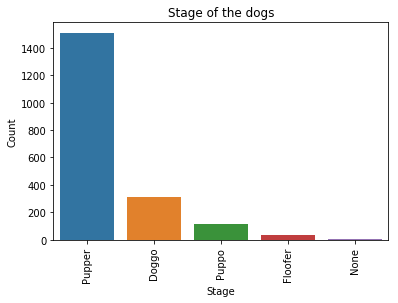

In [69]:
visual(archive_stage,"Stage of the dogs","Stage","Count")

###### Pupper is the most common stage followed by Doggo, Puppo and floofler respectivetly

In [70]:
archive_rating = archive_clean.rating.value_counts()

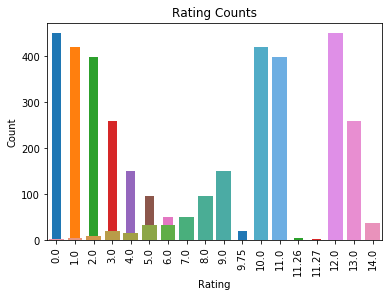

In [71]:
visual(archive_rating,"Rating Counts", "Rating", "Count")

###### As we could see, the rate 10 is the average, however thr the 12 its most common, the 0 rating can be the data containing wrong information letting this way 10 and 11 the second and third most rates given to the dogs

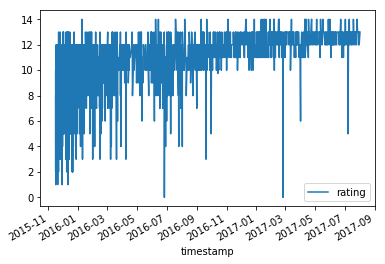

In [72]:
archive_clean.plot(x="timestamp", y="rating")
plt.show()

###### Over time its safe to say that the rating has been incresing. 

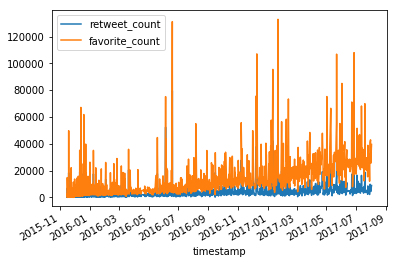

In [73]:
archive_clean.plot(x="timestamp", y=["retweet_count","favorite_count"])
plt.show()

###### Favorite Counts has cleared showed that is higher than the retweet counts, where only 2 times this situations changed letting the retweets come on top.

In [74]:
values=np.sort(archive_clean.rating.unique())
values

array([ 0.  ,  1.  ,  2.  ,  3.  ,  4.  ,  5.  ,  6.  ,  7.  ,  8.  ,
        9.  ,  9.75, 10.  , 11.  , 11.26, 11.27, 12.  , 13.  , 14.  ])

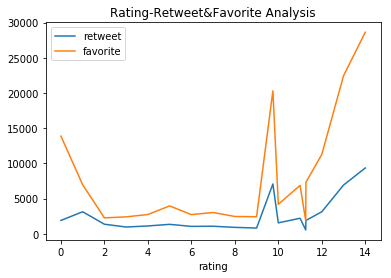

In [75]:
rating_analyze=pd.DataFrame(columns=['rating','retweet','favorite'])
rating_analyze['rating']=values
for x in rating_analyze['rating']:
    this_df=archive_clean[archive_clean.rating==x]
    
    rating_analyze.loc[rating_analyze.rating==x,'retweet']=this_df.retweet_count.mean()
    rating_analyze.loc[rating_analyze.rating==x,'favorite']=this_df.favorite_count.mean()

rating_analyze[['rating','retweet','favorite']].plot(x='rating',title='Rating-Retweet&Favorite Analysis')

##### Ignoring the fact that the favorites are more than retweet the trend has shown pretty much alike in both scenarions where only the peaks off retweets have almost the same number and at the same situation the pics showed to have an huge difference.